<a href="https://colab.research.google.com/github/jalonzoh/Challenge-de-Modelado-de-datos/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


#1. Análisis de facturación



     Tienda      Ingresos
0  Tienda 1  1.150880e+09
1  Tienda 2  1.116344e+09
2  Tienda 3  1.098020e+09
3  Tienda 4  1.038376e+09


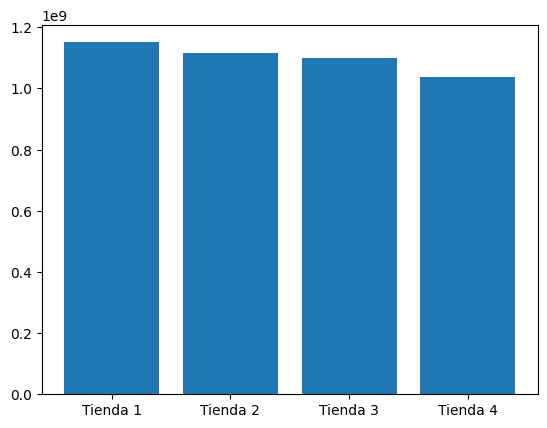

In [4]:
df_tienda = pd.DataFrame(tienda)
total_ingreso_tienda=df_tienda['Precio'].sum()

df_tienda2 = pd.DataFrame(tienda2)
total_ingreso_tienda2=df_tienda2['Precio'].sum()

df_tienda3 = pd.DataFrame(tienda3)
total_ingreso_tienda3=df_tienda3['Precio'].sum()

df_tienda4 = pd.DataFrame(tienda4)
total_ingreso_tienda4=df_tienda4['Precio'].sum()

ingresos_tiendas = {
                'Tienda':['Tienda 1',
                'Tienda 2',
                'Tienda 3',
                'Tienda 4'],
                'Ingresos':[total_ingreso_tienda,
                total_ingreso_tienda2,
                total_ingreso_tienda3,
                total_ingreso_tienda4]}

#index_labels = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

#df_ingresos_tiendas=pd.DataFrame(ingresos_tiendas,index_labels)
df_ingresos_tiendas=pd.DataFrame(ingresos_tiendas)
print(df_ingresos_tiendas)

#print(f'Ingreso T1: {total_ingreso_tienda} / Ingreso T2: {total_ingreso_tienda2} / Ingreso T3: {total_ingreso_tienda3} / Ingreso T4: {total_ingreso_tienda4} /')

import matplotlib.pyplot as plt

x_values = df_ingresos_tiendas['Tienda'].unique()
y_values = df_ingresos_tiendas['Ingresos']
plt.bar(x_values, y_values)
plt.show()
plt.close('all')


# 2. Ventas por categoría

In [54]:
df_group_tienda = df_tienda.groupby('Categoría del Producto').size().sort_values(ascending=False).head(1)
df_group_tienda2 = df_tienda2.groupby('Categoría del Producto').size().sort_values(ascending=False).head(1)
df_group_tienda3 = df_tienda3.groupby('Categoría del Producto').size().sort_values(ascending=False).head(1)
df_group_tienda4 = df_tienda4.groupby('Categoría del Producto').size().sort_values(ascending=False).head(1)

Ventas_Categoria = {
                'Tienda':['Tienda 1',
                'Tienda 2',
                'Tienda 3',
                'Tienda 4'],
                'Categoria':['Muebles',
                'Muebles',
                'Muebles',
                'Muebles'],
                'Cantidad Vendida':[df_group_tienda.Muebles,
                df_group_tienda2.Muebles,
                df_group_tienda3.Muebles,
                df_group_tienda4.Muebles]}

df_ventas_categoria=pd.DataFrame(Ventas_Categoria)
print(df_ventas_categoria)
df_ventas_categoria.dtypes

#print(df_group_tienda)
#print(df_group_tienda2)
#print(df_group_tienda3)
#print(df_group_tienda4)


     Tienda Categoria  Cantidad Vendida
0  Tienda 1   Muebles               465
1  Tienda 2   Muebles               442
2  Tienda 3   Muebles               499
3  Tienda 4   Muebles               480


,0
Tienda,object
Categoria,object
Cantidad Vendida,int64


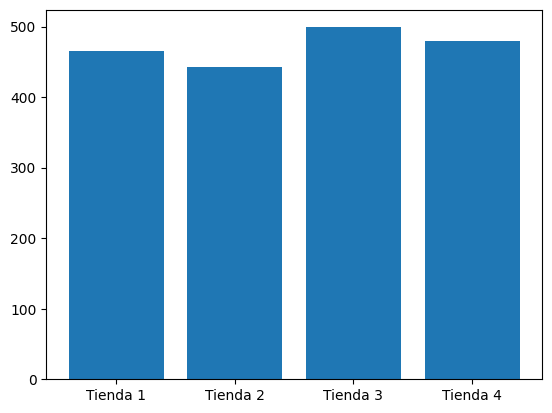

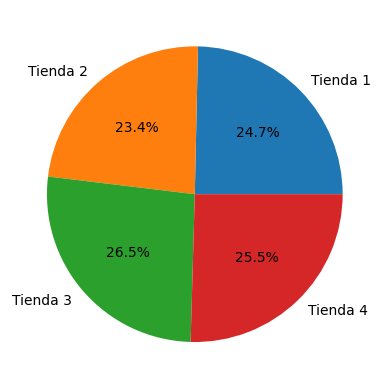

In [60]:
import matplotlib.pyplot as plt

x_values = df_ventas_categoria['Tienda'].unique()
y_values = df_ventas_categoria['Cantidad Vendida']
plt.bar(x_values, y_values)
plt.show()
plt.close('all')

plt.pie(df_ventas_categoria['Cantidad Vendida'], labels=df_ventas_categoria['Tienda'],autopct='%1.1f%%')
plt.show()
plt.close('all')

#plt( kind='pie', y='Cantidad Vendida', autopct='%1.0f%%')

# 3. Calificación promedio de la tienda


In [62]:
Calificacion_promedio_tienda = df_tienda['Calificación'].mean()
#print(Calificacion_promedio_tienda)
Calificacion_promedio_tienda2 = df_tienda2['Calificación'].mean()
#print(Calificacion_promedio_tienda2
Calificacion_promedio_tienda3 = df_tienda3['Calificación'].mean()
#print(Calificacion_promedio_tienda3)
Calificacion_promedio_tienda4 = df_tienda4['Calificación'].mean()
#print(Calificacion_promedio_tienda4)

     Tienda  Calificacion Promedio
0  Tienda 1               3.976685
1  Tienda 2               4.037304
2  Tienda 3               4.048326
3  Tienda 4               3.995759


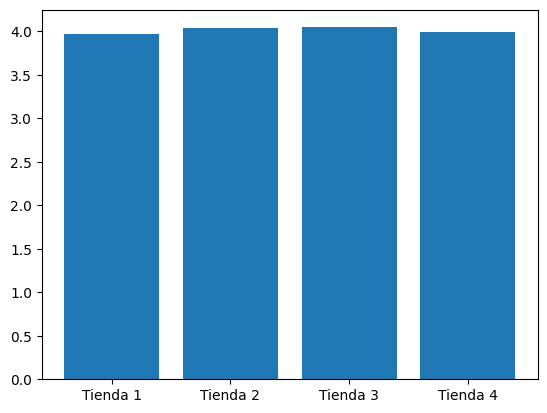

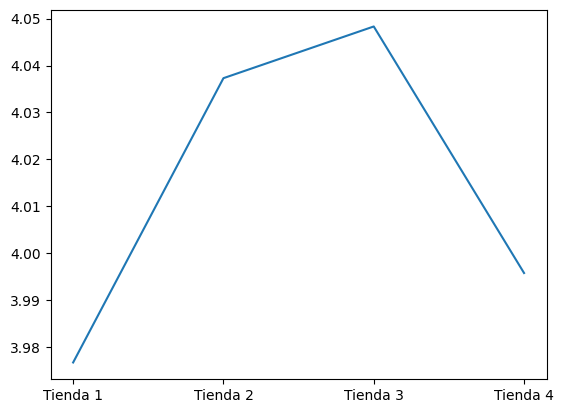

In [66]:
calificacion_tiendas = {
                'Tienda':['Tienda 1',
                'Tienda 2',
                'Tienda 3',
                'Tienda 4'],
                'Calificacion Promedio':[Calificacion_promedio_tienda,
                Calificacion_promedio_tienda2,
                Calificacion_promedio_tienda3,
                Calificacion_promedio_tienda4]}

df_calificacion_tienda=pd.DataFrame(calificacion_tiendas)
print(df_calificacion_tienda)

import matplotlib.pyplot as plt

x_values = df_calificacion_tienda['Tienda'].unique()
y_values = df_calificacion_tienda['Calificacion Promedio']
plt.bar(x_values, y_values)
plt.show()
plt.close('all')


plt.plot(x_values, y_values)
plt.show()
plt.close('all')

# 4. Productos más y menos vendidos

In [54]:
#group_productos_vendidost1= df_tienda.groupby('Producto')['Precio'].sum().agg(['min', 'max'])
group_productos_vendidost1= df_tienda.groupby('Producto')['Precio'].sum().sort_values(ascending=False)
print(f'Maximo: {group_productos_vendidost1.head(1)}')
print(f'Minimo: {group_productos_vendidost1.tail(1)}')

group_productos_vendidost2= df_tienda2.groupby('Producto')['Precio'].sum().sort_values(ascending=False)
print(f'Maximo: {group_productos_vendidost2.head(1)}')
print(f'Minimo: {group_productos_vendidost2.tail(1)}')

group_productos_vendidost3= df_tienda3.groupby('Producto')['Precio'].sum().sort_values(ascending=False)
print(f'Maximo: {group_productos_vendidost3.head(1)}')
print(f'Minimo: {group_productos_vendidost3.tail(1)}')

group_productos_vendidost4= df_tienda4.groupby('Producto')['Precio'].sum().sort_values(ascending=False)
print(f'Maximo: {group_productos_vendidost4.head(1)}')
print(f'Minimo: {group_productos_vendidost4.tail(1)}')




Maximo: Producto
TV LED UHD 4K    142150200.0
Name: Precio, dtype: float64
Minimo: Producto
Cuerda para saltar    652800.0
Name: Precio, dtype: float64
Maximo: Producto
Iphone 15    113225800.0
Name: Precio, dtype: float64
Minimo: Producto
Cubo mágico 8x8    643600.0
Name: Precio, dtype: float64
Maximo: Producto
Refrigerador    99889700.0
Name: Precio, dtype: float64
Minimo: Producto
Cubo mágico 8x8    640400.0
Name: Precio, dtype: float64
Maximo: Producto
Iphone 15    96697500.0
Name: Precio, dtype: float64
Minimo: Producto
Cuerda para saltar    704800.0
Name: Precio, dtype: float64


# 5. Envío promedio por tienda

In [55]:
Costo_envio_promedio_tienda = df_tienda['Costo de envío'].mean()
print(Costo_envio_promedio_tienda)

Costo_envio_promedio_tienda2 = df_tienda2['Costo de envío'].mean()
print(Costo_envio_promedio_tienda2)

Costo_envio_promedio_tienda3 = df_tienda3['Costo de envío'].mean()
print(Costo_envio_promedio_tienda3)

Costo_envio_promedio_tienda4 = df_tienda4['Costo de envío'].mean()
print(Costo_envio_promedio_tienda4)


26018.60958033065
25216.235693090293
24805.680373039424
23459.457167090754
